# 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Thu thập dữ liệu


### Dữ liệu thuộc chủ đề gì và lấy từ nguồn nào?
* Dữ liệu sử dụng trong đồ án được lấy từ trang kaggle thu thập các thông tin về "Data scientist salary"
 

# 3. KHÁM PHÁ DỮ LIỆU

### Đọc dữ liệu từ file csv vào dataframes

In [2]:
project_dataframe= pd.read_csv('data/salary_data.csv',index_col='index')
# project_dataframe.drop("Unnamed: 5",axis=1, inplace=True)
project_dataframe.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [3]:
num_rows, num_cols= project_dataframe.shape
print("num_rows =", num_rows,"; num_cols = ",num_cols)

num_rows = 742 ; num_cols =  41


### Mỗi dòng có ý nghĩa gì? 

Mỗi dòng chứa các thông tin về mức lương tối thiểu/ tối đa/ trung bình, mô tả công việc, tuổi công ty,....
Các giá trị -1 nghĩa là thông tin không có sẵn.

### Có vấn đề các dòng có ý nghĩa khác nhau không?

Nhìn tổng quan, các dòng đều giống nhau về ý nghĩa

### Dữ liệu có các dòng bị lặp không?

In [4]:
duplicated_rows=project_dataframe.duplicated().any()
print('Have duplicated rows? => ',duplicated_rows)
# Xóa các dòng bị lặp
if(duplicated_rows==True):
    print("delete duplicated rows")
    project_dataframe.drop_duplicates(inplace=True)

# Số dòng và số cột sau khi xóa các dòng bị lặp
    print("new_num_rows=",project_dataframe.shape[0],"; new_num_cols =",project_dataframe.shape[1])

Have duplicated rows? =>  True
delete duplicated rows
new_num_rows= 467 ; new_num_cols = 41


### Mỗi cột có ý nghĩa gì?

In [5]:

Salary_data_descript=pd.read_csv('Data_description/Data_salary_decription.csv',sep=',')

pd.set_option('display.max_colwidth',None)
Salary_data_descript

,Columns,description
0,Index,id
1,Job Title,The title of job
2,Salary Estimate,Range of salary and the source
3,Job Description,Tells us what qualities that company want and what is expected out of the job title
4,Rating,rating of the company
5,Company Name,Name of the company
6,Location,Location of the job
7,Headquarters,Location of headquarter of the company
8,Size,Range of number of employee working in the company
9,Founded,Company founded in year


### Mỗi cột hiện đang có kiểu dữ liệu gì? 

In [6]:
project_dataframe.dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau   

Các cột dữ liệu đang có type là "Object", kiểm tra các kiểu dữ liệu tồn tại trong nội bộ các cột.

In [7]:
def type_(value):
    return type(value)
def check_type(s):
    dtypes = set()
    h=s.apply(type_)
    dtypes=set(h)
    return dtypes
col_name=project_dataframe.columns

df_Types=[]
for i in col_name:
    df_Types.append(check_type(project_dataframe[i]))
for i in range(len(col_name)):
    print("dtype of ",col_name[i]," :",df_Types[i])

# project_dataframe.dtypes

dtype of  Job Title  : {<class 'str'>}
dtype of  Salary Estimate  : {<class 'str'>}
dtype of  Job Description  : {<class 'str'>}
dtype of  Rating  : {<class 'float'>}
dtype of  Company Name  : {<class 'str'>}
dtype of  Location  : {<class 'str'>}
dtype of  Headquarters  : {<class 'str'>}
dtype of  Size  : {<class 'str'>}
dtype of  Founded  : {<class 'int'>}
dtype of  Type of ownership  : {<class 'str'>}
dtype of  Industry  : {<class 'str'>}
dtype of  Sector  : {<class 'str'>}
dtype of  Revenue  : {<class 'str'>}
dtype of  Competitors  : {<class 'str'>}
dtype of  Hourly  : {<class 'int'>}
dtype of  Employer provided  : {<class 'int'>}
dtype of  Lower Salary  : {<class 'int'>}
dtype of  Upper Salary  : {<class 'int'>}
dtype of  Avg Salary(K)  : {<class 'float'>}
dtype of  company_txt  : {<class 'str'>}
dtype of  Job Location  : {<class 'str'>}
dtype of  Age  : {<class 'int'>}
dtype of  Python  : {<class 'int'>}
dtype of  spark  : {<class 'int'>}
dtype of  aws  : {<class 'int'>}
dtype of 

### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?



Suy nghĩ: 
* Có một số cột chưa phù hợp hoặc cần thiết cho việc tính toán, ta có thể đi xử lý dữ liệu dần dần trong quá trình trả lời câu hỏi.
* Cột "Salary Estimate" khá quan trọng nhưng nó chưa có dạng dữ liệu phù hợp, nó có ý nghĩa chỉ giá trị lương trong một khoảng nào đó. 
* Trong đồ án này, ta sẽ thực hiện 2 việc với cột này:
   + Tạo 1 cột "avarage salary" lưu giữ giá trị lương trung bình
   + Đưa cột "Salary Estimate" về 1 array có dạng [ min_salary, max_salary] để dùng cho việc trả lời câu hỏi sau này

1. Đưa cột "Salary Estimate" về 1 array có dạng [ min_salary, max_salary]

In [8]:
character_remove=["Glassdoor est.","K","−"]


#chỉ lấy khoảng giá trị, bỏ nguồn  ví dụ  [$53K-$91K , Glassdoor est.)]  bỏ  Glassdoor est.)
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.split(" ").str[0]   #.str[0]



project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("K",'',regex= False) 
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("-",',',regex=False)
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("$",'',regex=False)



def change_narray(s):
    s=s.split(",")
    try:     
        s=np.array(s,dtype=float)
     # có 1 số dòng là ngoại lệ nên không thể xử lý được theo cách trên, 
    #  ta gán giá trị bằng 0 và loại bỏ các dòng này ra khỏi dữ liệu
    except ValueError:  
        s=np.nan
    return s

project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].apply(change_narray)



# #loại bỏ các dòng =0
index_removed=project_dataframe['Salary Estimate'][project_dataframe['Salary Estimate'].isna()==True].index

project_dataframe=project_dataframe.drop(index_removed)





# project_dataframe['Salary Estimate']
# project_dataframe['Lower Salary']       # jjjjj

Sau khi xử lý, cột "salary estimate" đang giữ khoảng lương [min,max]

2.Tạo 1 cột "avarage salary" lưu giữ giá trị lương trung bình

In [9]:

def avarage_salary(s):
    return s[0]/2 + s[1]/2
project_dataframe['Avarage salary']=project_dataframe['Salary Estimate'].apply(avarage_salary)



### Loại bỏ các cột không sử dụng đến

Nhóm sẽ bỏ đi một vài cột không cần thiết như: ```Job Description```, ```Company Name```,```Job Location```, ```Age```, ```Competitors```,```Hourly```,```Employer provided```.

In [10]:
project_dataframe.drop(['Job Description','Company Name','Competitors','Employer provided','Hourly',\
            'Job Location','Age']\
            ,axis=1, inplace=True)
project_dataframe.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Avarage salary
index,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,"[53.0, 91.0]",3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,72.0
1,Healthcare Data Scientist,"[63.0, 112.0]",3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,...,0,0,0,0,0,0,data scientist,na,M,87.5
2,Data Scientist,"[80.0, 90.0]",4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,...,0,0,0,0,0,0,data scientist,na,M,85.0
3,Data Scientist,"[56.0, 97.0]",3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",...,0,0,0,0,0,0,data scientist,na,na,76.5
4,Data Scientist,"[86.0, 143.0]",2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,...,0,0,0,0,0,0,data scientist,na,na,114.5


### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?


• Min? max? 

→ Có gì bất thường không?

In [11]:
# những cột dữ liệu dạng số thuần túy
num_col_profile = project_dataframe[['Rating','Lower Salary','Upper Salary','Avg Salary(K)']]

# những cột dữ liệu yêu cầu kỹ năng này cho công việc (1 là cần, 0 là không cần thiết cho công việc)
skill_col_profile = project_dataframe[['Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor',\
                            'hadoop','tableau','bi','flink','mongo','google_an']]

In [12]:
db=num_col_profile.describe()
db

,Rating,Lower Salary,Upper Salary,Avg Salary(K)
count,450.000000,450.000000,450.000000,450.000000
mean,3.700444,73.333333,127.831111,100.582222
std,0.604917,27.980983,43.064802,35.150835
min,-1.000000,20.000000,35.000000,27.500000
25%,3.400000,53.000000,97.250000,75.625000
50%,3.700000,69.000000,124.000000,96.750000
75%,4.075000,87.750000,150.000000,120.875000
max,5.000000,202.000000,306.000000,254.000000


-> có bất thường tại min của cột rating (xem nguyên nhân và xử lý)
theo mô tả tập dữ liệu, các giá trị thiếu được thay thế bằng -1
để tiếp tục xử lý, ta sẽ điền giá trị mean thay thế cho giá trị -1

In [13]:
R=project_dataframe["Rating"]
R=R[R==-1]
R.shape

(1,)

chỉ có 1 dòng rating bị thiếu dữ liệu, vậy ta sẽ thay thế giá trị thiếu bằng giá trị mean

In [14]:

pd.options.mode.chained_assignment = None # default='warn'

index_replace=num_col_profile["Rating"][num_col_profile["Rating"]==-1].index

num_col_profile.loc[index_replace,"Rating"]=db.loc['mean','Rating']
num_col_profile.describe()

,Rating,Lower Salary,Upper Salary,Avg Salary(K)
count,450.000000,450.000000,450.000000,450.000000
mean,3.710890,73.333333,127.831111,100.582222
std,0.562679,27.980983,43.064802,35.150835
min,1.900000,20.000000,35.000000,27.500000
25%,3.400000,53.000000,97.250000,75.625000
50%,3.700000,69.000000,124.000000,96.750000
75%,4.075000,87.750000,150.000000,120.875000
max,5.000000,202.000000,306.000000,254.000000


• Số-lượng/tỉ-lệ các giá trị thiếu?

In [15]:

# tỉ lệ các giá trị thiếu
def missing_percent(s):
    missing_count=s.isnull().sum() 
    result=float(missing_count)/float(s.shape[0]) * float(100)
    return result

col_name=num_col_profile.columns
for i in col_name:
    missing=missing_percent(num_col_profile[i])
    print("{", i, ": ",missing, "}")
col_name=skill_col_profile.columns
for i in col_name:
    missing=missing_percent(skill_col_profile[i])
    print("{", i, ": ",missing, "}")

{ Rating :  0.0 }
{ Lower Salary :  0.0 }
{ Upper Salary :  0.0 }
{ Avg Salary(K) :  0.0 }
{ Python :  0.0 }
{ spark :  0.0 }
{ aws :  0.0 }
{ excel :  0.0 }
{ sql :  0.0 }
{ sas :  0.0 }
{ keras :  0.0 }
{ pytorch :  0.0 }
{ scikit :  0.0 }
{ tensor :  0.0 }
{ hadoop :  0.0 }
{ tableau :  0.0 }
{ bi :  0.0 }
{ flink :  0.0 }
{ mongo :  0.0 }
{ google_an :  0.0 }


In [16]:
# số người biết, không biết kĩ năng nào đó
skill_col_profile.agg([pd.Series.value_counts])

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0,197,342,343,211,200,408,432,427,415,403,371,354,412,442,427,442
1,253,108,107,239,250,42,18,23,35,47,79,96,38,8,23,8


In [17]:
#vẽ cột....

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
• Số-lượng/tỉ-lệ các giá trị thiếu?

• Số lượng các giá trị khác nhau? Show một vài giá trị

→ Có gì bất thường không?

- Các cột có kiểu dữ liệu dạng phân loại (categorical) là: ```Job Title```, ```Salary Estimate```, ```Location```, ```Headquarters```, ```Size```, ```Type of ownership```, ```Industry```,```Sector```, ```Revenue```, ```company_txt```, ```job_title_sim```, ```seniority_by_title```, ```Degree```.
- Cần chuyển những cột dữ liệu dạng phân loại sau thành dạng số: ```Salary Estimate```, ```Size```, ```Revenue```.

In [18]:
cate_col_profile = project_dataframe[['Job Title','Location', 'Headquarters','Type of ownership', 'Industry','Sector',\
                          'company_txt', 'job_title_sim', 'seniority_by_title', 'Degree']]


In [19]:
cate_col_profile.head()

,Job Title,Location,Headquarters,Type of ownership,Industry,Sector,company_txt,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,
0,Data Scientist,"Albuquerque, NM","Goleta, CA",Company - Private,Aerospace & Defense,Aerospace & Defense,Tecolote Research,data scientist,na,M
1,Healthcare Data Scientist,"Linthicum, MD","Baltimore, MD",Other Organization,Health Care Services & Hospitals,Health Care,University of Maryland Medical System,data scientist,na,M
2,Data Scientist,"Clearwater, FL","Clearwater, FL",Company - Private,Security Services,Business Services,KnowBe4,data scientist,na,M
3,Data Scientist,"Richland, WA","Richland, WA",Government,Energy,"Oil, Gas, Energy & Utilities",PNNL,data scientist,na,na
4,Data Scientist,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,Affinity Solutions,data scientist,na,na


In [20]:
#tính giá trị thiếu, loại bỏ giá trị thiếu


def missing_percent(s):
    missing_count=s.isnull().sum() 
    result=float(missing_count)/float(s.shape[0]) * float(100)
    return result

col_name=cate_col_profile.columns
missing_ratio=[]
for i in col_name:
    missing=missing_percent(cate_col_profile[i])
    print("{", i, ": ",missing, "}")


{ Job Title :  0.0 }
{ Location :  0.0 }
{ Headquarters :  0.0 }
{ Type of ownership :  0.0 }
{ Industry :  0.0 }
{ Sector :  0.0 }
{ company_txt :  0.0 }
{ job_title_sim :  0.0 }
{ seniority_by_title :  0.0 }
{ Degree :  0.0 }


# 4. Đưa ra các câu hỏi có ý nghĩa cần trả lời

# 5.Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

### 1. 20 giá trị mức lương cao nhất (upper salary) và ba kĩ năng  phổ biến nhất để đạt được mức lương đó. 
(để chúng ta ưu tiên phát triển các kỹ năng này chẳng hạn)

top 20 giá trị lương cao nhất

In [21]:

max_salary_list=np.unique(num_col_profile["Upper Salary"])
max_salary_list=-np.sort(-max_salary_list)
max_salary_list=max_salary_list[:20]





3 kỹ năng phổ biến để đạt mức lương đó

In [22]:
index=num_col_profile["Upper Salary"][num_col_profile["Upper Salary"].isin(max_salary_list)].index
top_skill=skill_col_profile.loc[index,:]

top_skill=top_skill.agg([pd.Series.value_counts])  # 1: biết kĩ năng đó, 0: không biết

top_skill=top_skill.loc[1,:]
top_skill=top_skill.droplevel(level=1) # delete columns "value_counts"
top_skill

Python       19.0
spark         7.0
aws           9.0
excel        16.0
sql          15.0
sas           5.0
keras         2.0
pytorch       NaN
scikit        5.0
tensor        3.0
hadoop        7.0
tableau       4.0
bi            1.0
flink         1.0
mongo         2.0
google_an     NaN
Name: 1, dtype: float64

Nhận xét : ta thấy 2 kỹ năng "pytorch","google_an" không có ai trong những người lương cao biết, loại bỏ khỏi top_skill 

In [23]:
top_skill=top_skill.drop(index=['pytorch','google_an'])

top_skill

Python     19.0
spark       7.0
aws         9.0
excel      16.0
sql        15.0
sas         5.0
keras       2.0
scikit      5.0
tensor      3.0
hadoop      7.0
tableau     4.0
bi          1.0
flink       1.0
mongo       2.0
Name: 1, dtype: float64

vẽ biểu đồ bar chart thể hiện số người biết các kĩ năng này

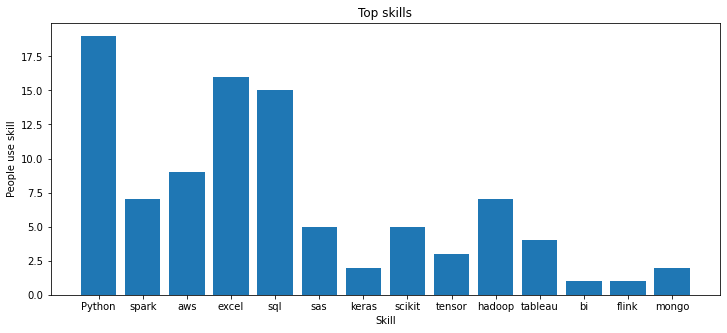

In [24]:


x = np.array(top_skill.index)

y = top_skill.values
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Top skills')
plt.xlabel('Skill')
plt.ylabel('People use skill')

plt.bar(x, y )
plt.show()

Nhìn vào đồ thị, ta thấy python, excel, sql là top 3 kỹ năng được những người lương cao sử dụng phổ biến nhất

### 4. Mức lương cao nhất và thấp nhất trong mỗi công việc (job title) là bao nhiêu ?
- EDA: biểu đồ tròn (mỗi lĩnh vực - sector chiếm bao nhiêu % trong tổng khảo sát) và cột chồng (kĩ năng ==> 4 kĩ năng nào là phổ biến nhất).

In [25]:
job_list=project_dataframe.groupby(["Job Title"])

salary_distribution=pd.DataFrame

max_salary=job_list["Upper Salary"].apply(lambda x: x.max())  # chọn ra giá trị lương lớn nhất của ngành đó
min_salary=job_list["Lower Salary"].apply(lambda x: x.min())
job_name=max_salary.index
salary_distribution=pd.DataFrame([max_salary.tolist(),min_salary.tolist()], index=['max_salary', 'min_salary'],columns=job_name)




ta xem những công việc có "max salary" thấp nhất trong các công việc là công việc có mức lương thấp nhất ( minimum salary), công việc có "max salary" cao nhất trong các công việc là công việc có mức lương cao nhất (maximum salary)

In [26]:
salary_distribution = salary_distribution.sort_values(by='max_salary',axis=1)
top10_salary_distribution_min = salary_distribution.iloc[:,:10]
top10_salary_distribution_max = salary_distribution.iloc[:,-10:]

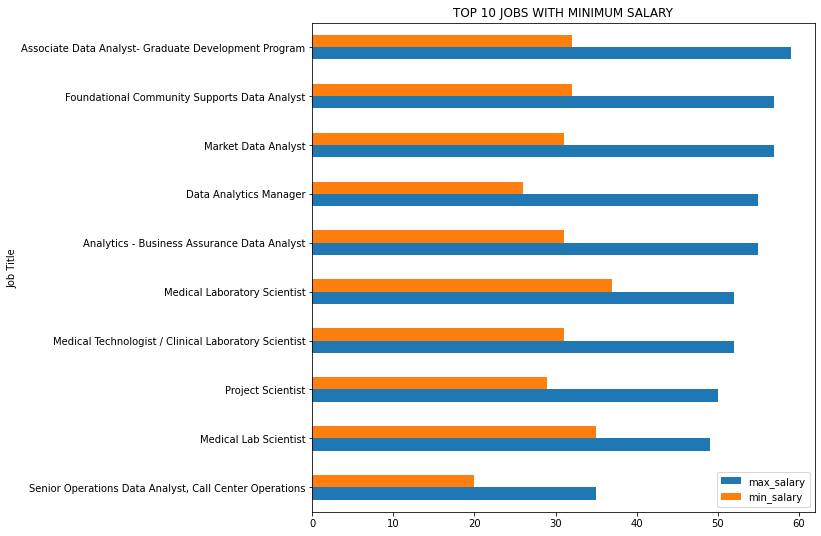

In [27]:
top10_salary_distribution_min.stack().unstack(0).plot.barh(figsize=(9,9))
plt.title("TOP 10 JOBS WITH MINIMUM SALARY");

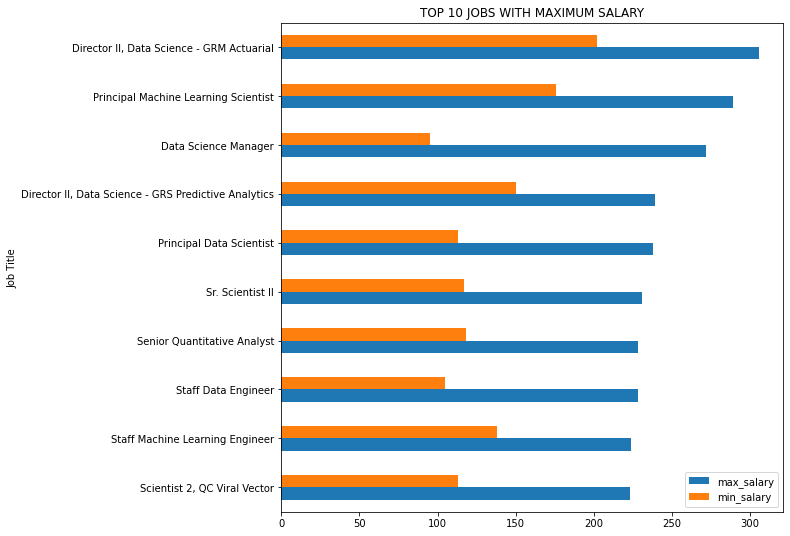

In [28]:
top10_salary_distribution_max.stack().unstack(0).plot.barh(figsize=(9,9))
plt.title("TOP 10 JOBS WITH MAXIMUM SALARY");

### 5. Mỗi lĩnh vực (sector) chiếm bao nhiêu % trong tổng khảo sát. Vẽ biểu đồ tròn

In [29]:
total=project_dataframe["Sector"].shape[0]

ratio=project_dataframe["Sector"].value_counts()
ratio.drop(["-1"],axis=0,inplace=True)
print(ratio)


Information Technology              119
Business Services                    68
Biotech & Pharmaceuticals            62
Insurance                            41
Finance                              25
Health Care                          24
Aerospace & Defense                  20
Manufacturing                        18
Education                            13
Oil, Gas, Energy & Utilities          8
Retail                                8
Government                            7
Non-Profit                            7
Media                                 5
Travel & Tourism                      5
Transportation & Logistics            4
Consumer Services                     3
Telecommunications                    3
Real Estate                           3
Mining & Metals                       2
Arts, Entertainment & Recreation      1
Agriculture & Forestry                1
Accounting & Legal                    1
Name: Sector, dtype: int64


Để biểu diễn biểu đồ hiệu quả hơn về mặt thị giác, ta sẽ gộp các sector chiếm tỉ lệ nhỏ vào cùng 1 mục

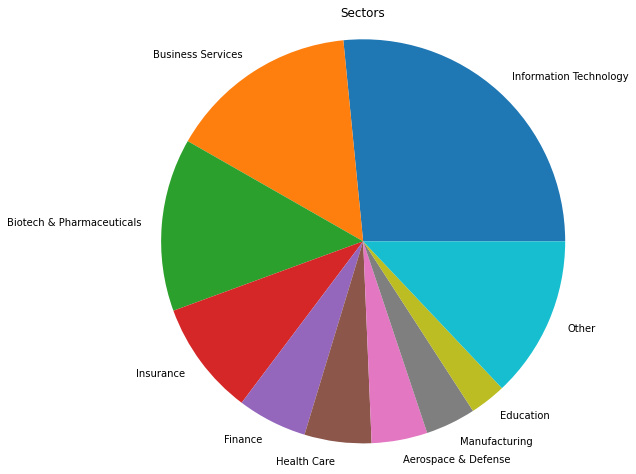

In [30]:
#gộp các dòng có số liệu nhỏ lại và xóa các dòng này đi
s = ratio[["Retail","Oil, Gas, Energy & Utilities","Government","Non-Profit","Media","Travel & Tourism",\
           "Transportation & Logistics","Telecommunications","Consumer Services","Real Estate","Mining & Metals",\
           "Agriculture & Forestry","Arts, Entertainment & Recreation","Accounting & Legal"]].sum()
ratio = ratio.drop(["Retail","Oil, Gas, Energy & Utilities","Government","Non-Profit","Media","Travel & Tourism",\
           "Transportation & Logistics","Telecommunications","Consumer Services","Real Estate","Mining & Metals",\
           "Agriculture & Forestry","Arts, Entertainment & Recreation","Accounting & Legal"])
ratio["Other"] = s

plt.figure(figsize=(8,8))
sector_label=ratio.index
plt.pie(ratio.tolist(),labels=sector_label)
plt.title('Sectors')
plt.axis('equal')
plt.show()

**Nhận xét:**


=> ta nhận thấy rằng các ngành mang lại lợi nhuận "khủng" nhất đều có sự góp mặt đáng kể của khoa học dữ liệu.